# Computer Vision Projects Notebook

## Project 1: Grayscale Analysis & Motion Detection

### 1.1 Overview

In this project, we convert surveillance camera images to grayscale and analyze them for motion detection and light source identification.

### 1.2 Objectives

- Convert color image to grayscale
- Compare original vs grayscale representation
- Evaluate grayscale effectiveness for motion detection
- Detect the brightest pixel to locate light sources

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1.3 Code: Comparison - Original vs Grayscale

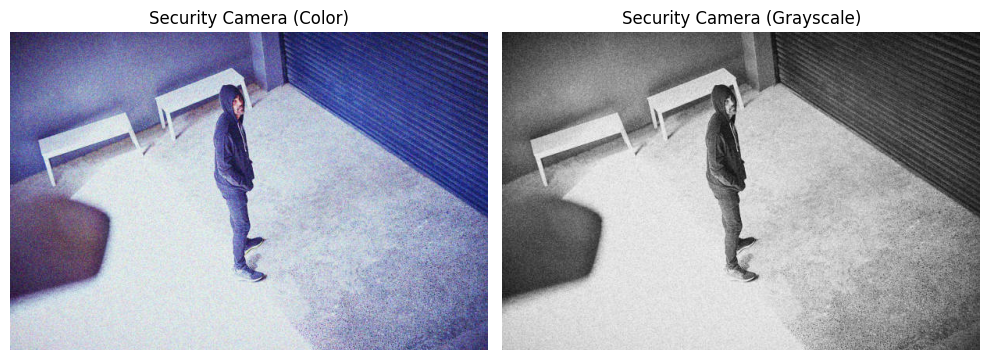

In [41]:
# 1) Read and convert to RGB (for correct display in Matplotlib)
image = cv2.imread('./images/security-camera.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 2) Make a grayscale version
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 3) Show both side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Left: color image
axes[0].imshow(image)
axes[0].set_title('Security Camera (Color)')
axes[0].axis('off')

# Right: grayscale image (use cmap='gray'!)
axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Security Camera (Grayscale)')
axes[1].axis('off')

plt.tight_layout()
plt.show()


### 1.4 Analysis: Is Grayscale Better for Motion Detection?

**Answer: YES - Grayscale is better for motion detection**

**Why?**

- **Reduces computation**: Only 1 channel instead of 3 (RGB)
- **Avoids color noise**: Movement shows up as brightness changes, not color changes
- **Better for surveillance**: Color isn't critical for detecting motion; intensity is
- **Faster processing**: Less data to process means faster detection

Motion detection methods (frame differencing, background subtraction) look for **changes in brightness** between frames. Grayscale captures this directly.

### 1.5 Code: Finding the Brightest Pixel

In [42]:
# Maximum intensity value
max_val = np.max(gray_image)

# Position of the brightest pixel
max_pos = np.unravel_index(np.argmax(gray_image), gray_image.shape)

print(f"Brightest pixel value: {max_val}")
print(f"Location (row, col): {max_pos}")


Brightest pixel value: 254
Location (row, col): (np.int64(137), np.int64(117))


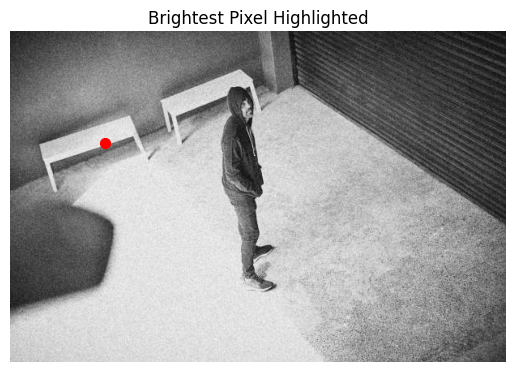

In [43]:

# Visualize the brightest pixel
plt.imshow(gray_image, cmap='gray')
plt.scatter([max_pos[1]], [max_pos[0]], c='red', s=50, marker='o')  # mark brightest pixel
plt.title('Brightest Pixel Highlighted')
plt.axis('off')
plt.show()


### 1.6 Results

- **Brightest pixel value**: 254 (almost maximum 255)
- **Location**: Row 137, Column 117
- **Interpretation**: This location marks a light source in the surveillance area

## Project 2: Traffic Light Detection using Color Spaces

### 2.1 Overview

In this project, we detect which traffic light is active (red, orange, or green) by converting to HSV color space and creating color masks.

### 2.2 Objectives

- Convert color image to HSV color space
- Create masks for red, orange, and green lights
- Automatically detect which light is currently ON

### 2.3 Why HSV Instead of BGR/RGB?

**The Problem with BGR/RGB:**

- Colors are mixed together (R, G, B channels)
- Same color at different brightness levels = different values
- Hard to detect specific colors reliably

**The Solution - HSV:**

- **H (Hue)**: The actual color (0-180 in OpenCV)
- **S (Saturation)**: Color purity
- **V (Value)**: Brightness

A red light stays in the same **Hue range** (0-10) regardless of how bright or dim it is. This makes color detection much more reliable!


### 2.4 Code: Convert to HSV and Display

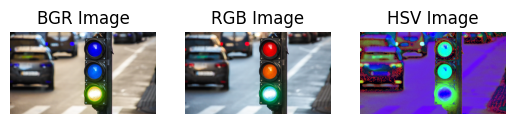

In [44]:
# Load image
bgr_image = cv2.imread('./images/traffic-light.jpg')
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

# Display all three color spaces
plt.subplot(1, 3, 1)
plt.imshow(bgr_image)
plt.title("BGR Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(hsv_image)
plt.title("HSV Image")
plt.axis("off")

plt.show()

### 2.5 Code: Create Color Masks

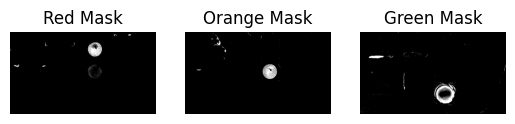

In [45]:
# Define HSV ranges for each color
lower_red = np.array([0, 120, 100])
upper_red = np.array([5, 255, 255])

lower_orange = np.array([8, 120, 100])
upper_orange = np.array([20, 255, 255])

lower_green = np.array([40, 80, 100])
upper_green = np.array([100, 255, 255])

# Create masks using inRange()
# If pixel HSV is between lower and upper bounds → WHITE (255)
# Otherwise → BLACK (0)
mask_red = cv2.inRange(hsv_image, lower_red, upper_red)
mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Display all masks
plt.subplot(1, 3, 1)
plt.imshow(mask_red, cmap='gray')
plt.title("Red Mask")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask_orange, cmap='gray')
plt.title("Orange Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(mask_green, cmap='gray')
plt.title("Green Mask")
plt.axis("off")

plt.show()

### 2.6 Code: Detect Which Light is ON

In [46]:
# Count white pixels in each mask
# cv2.countNonZero() counts all pixels that are NOT 0 (i.e., white pixels)
count_red = cv2.countNonZero(mask_red)
count_orange = cv2.countNonZero(mask_orange)
count_green = cv2.countNonZero(mask_green)

print(f"Red pixels: {count_red}")
print(f"Orange pixels: {count_orange}")
print(f"Green pixels: {count_green}")

# Find which light has the most white pixels
if count_red > count_orange and count_red > count_green:
    light_on = "RED"
elif count_orange > count_red and count_orange > count_green:
    light_on = "ORANGE"
elif count_green > count_red and count_green > count_orange:
    light_on = "GREEN"
else:
    light_on = "UNKNOWN"

print(f"\n🚦 Light Detected: {light_on}")

Red pixels: 9268
Orange pixels: 9837
Green pixels: 14999

🚦 Light Detected: GREEN


# Project 3: Drawing on Images - Football Match

## Overview
In this project, we learn how to draw shapes, arrows, and text on images using OpenCV. We'll work with a football match image to annotate the ball location and shot information.

## Objectives
- Draw rectangles around objects (the ball)
- Draw arrows indicating direction (shot direction)
- Add text annotations with information (shot speed)
- Understand OpenCV drawing functions

## Step 1: Load and Display the Image

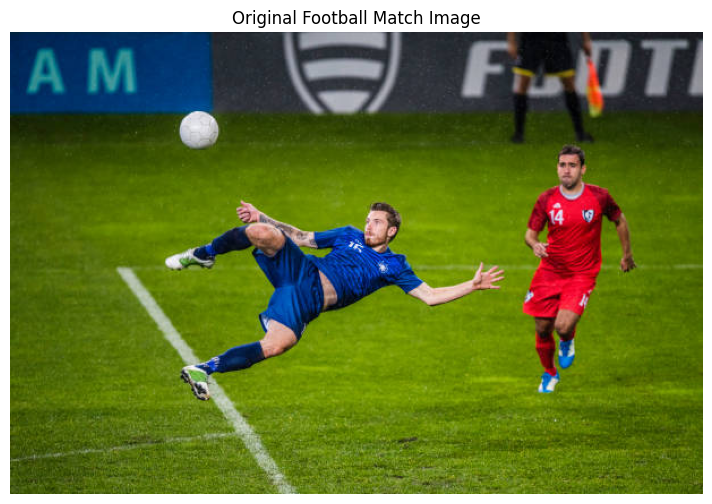

In [47]:
# Load the football match image
football_match_bgr= cv2.imread('./images/football-match.jpg')
football_match_rgb = cv2.cvtColor(football_match_bgr, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(10, 6))
plt.imshow(football_match_rgb)
plt.title("Original Football Match Image")
plt.axis("off")
plt.show()

## Step 2: Draw a Rectangle Around the Ball

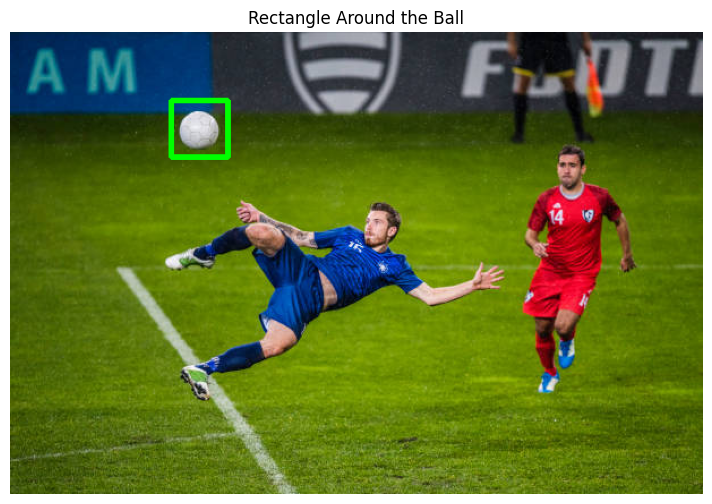

In [48]:
x, y, w, h = 142, 60, 50, 50 
cv2.rectangle(football_match_rgb, (x, y), (x + w, y + h), (0, 255, 0), 3)
plt.figure(figsize=(10, 6))
plt.imshow(football_match_rgb)
plt.title("Rectangle Around the Ball")
plt.axis("off")
plt.show()

## Step 3: Draw an Arrow Indicating Shot Direction

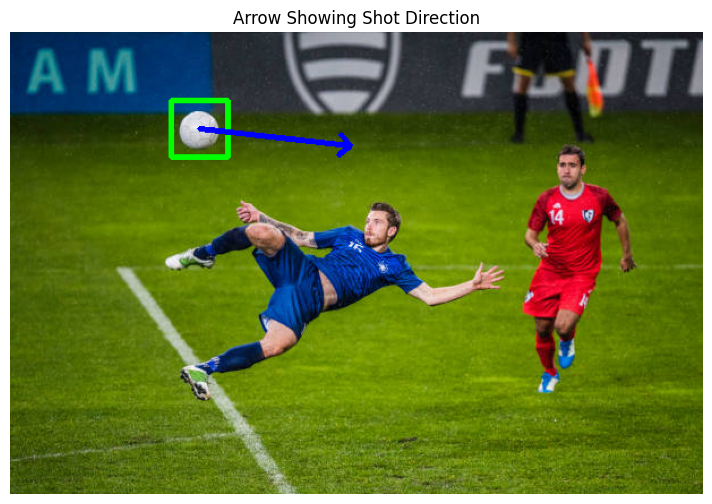

In [49]:
# Ball center (approximate)
start_point = (x + w//2, y + h//2)

# Arrow endpoint (direction of the shot)
end_point = (300, 100)

# Draw arrow
cv2.arrowedLine(football_match_rgb, start_point, end_point, (0, 0, 255), 3)

# Display
plt.figure(figsize=(10, 6))
plt.imshow(football_match_rgb)
plt.title("Arrow Showing Shot Direction")
plt.axis("off")
plt.show()

## Step 4: Add Text Annotation

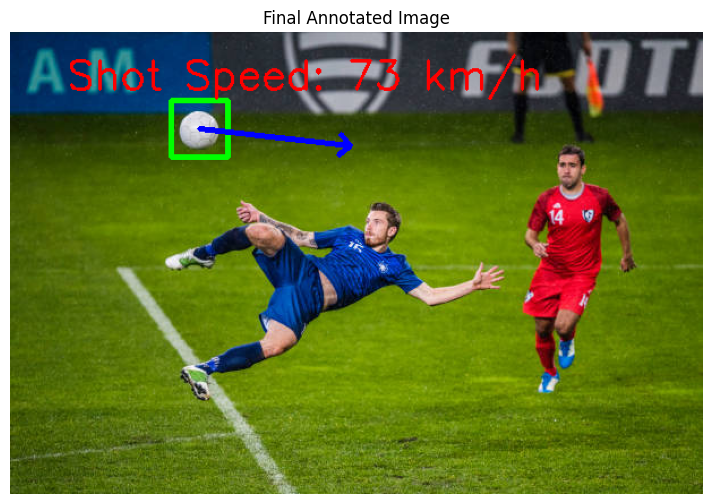

In [50]:
text = "Shot Speed: 73 km/h"
text_position = (50, 50) 
cv2.putText(football_match_rgb, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 2)

# Display
plt.figure(figsize=(10, 6))
plt.imshow(football_match_rgb)
plt.title("Final Annotated Image")
plt.axis("off")
plt.show()

# Project 4: Image Transformations (Translation + Rotation)

## Overview

In this project, we learn how to apply geometric transformations to images using OpenCV. We'll work with a tilted photo to estimate the tilt angle and rotate it to straighten the scene.

## Objectives

- Understand image rotation and translation
- Estimate the tilt angle of an image
- Apply inverse rotation to straighten the scene
- Compare before and after transformations

## Step 1: Load and Display the Tilted Image

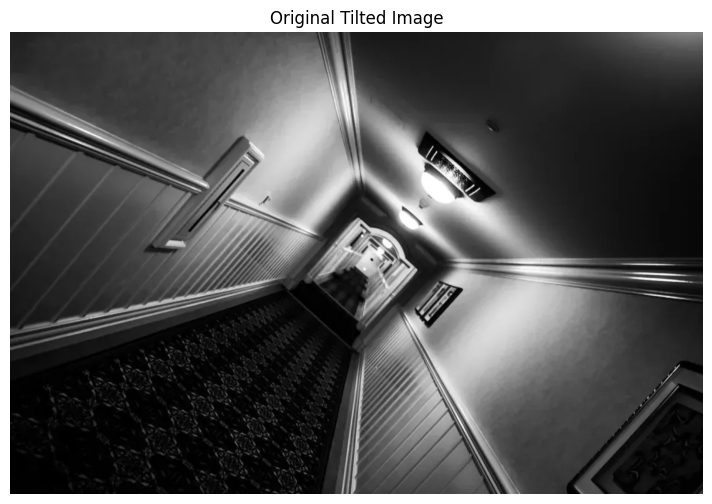

Image dimensions: 1110x740


In [51]:
image = cv2.imread('./images/tilted-photo.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width = image_rgb.shape[:2]

# Display the original tilted image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Original Tilted Image")
plt.axis("off")
plt.show()

print(f"Image dimensions: {width}x{height}")

## Step 2: Estimate the Tilt Angle

In [59]:
estimated_angle = -42
print(f"Estimated tilt angle: {estimated_angle}°")

Estimated tilt angle: -42°


## Step 3: Apply Rotation to Straighten the Image

Rotation matrix:
[[   0.74314483    0.66913061 -105.02370249]
 [  -0.66913061    0.74314483  466.4039011 ]]


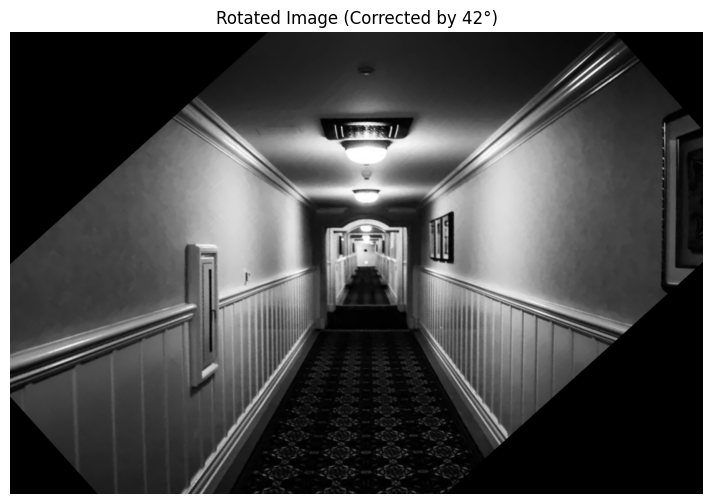

In [60]:
# Calculate the center of the image
center = (width // 2, height // 2)
# Get rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, -estimated_angle, 1.0)

print(f"Rotation matrix:\n{rotation_matrix}")

# Apply rotation
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (width, height))

# Display the rotated image
plt.figure(figsize=(10, 6))
plt.imshow(rotated_image)
plt.title(f"Rotated Image (Corrected by {-estimated_angle}°)")
plt.axis("off")
plt.show()

## Step 4: Compare Before and After

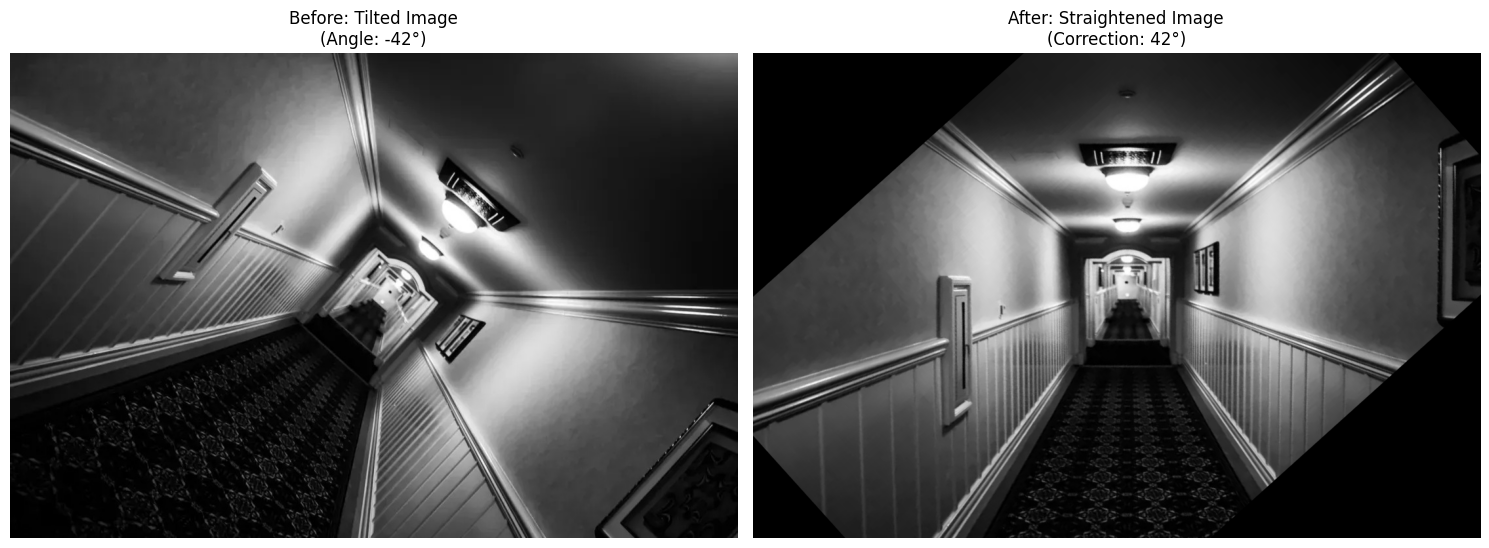

In [61]:
# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Before: Original tilted image
ax1.imshow(image_rgb)
ax1.set_title(f"Before: Tilted Image\n(Angle: {estimated_angle}°)")
ax1.axis("off")

# After: Straightened image
ax2.imshow(rotated_image)
ax2.set_title(f"After: Straightened Image\n(Correction: {-estimated_angle}°)")
ax2.axis("off")

plt.tight_layout()
plt.show()